# Data Science 100 Final Project Report
Exploration of How Playing Time and Age Relates to a Player's Experience Level - by Romina Aliabadi

**Introduction:**

Minecraft is a popular gaming platform that allows its users to build, customize and explore worlds in different modes. A research group at UBC in the Computer Science department was led by Frank Wood in order to have recorded player actions and other data as they played on a designated Minecraft server. The objective of collecting this data was to explore how people play videogames, but several questions of interest regarding player behaviour and characteristics arise to help refine this research process. The focus of the following report is to explore the question: Can the combination of individual playing times and age be used to predict a players experience level in the players.csv dataset? The intended result of answering this question is to create a functional classification model that can ideally be trained by the dataset to accurately predict a players experience level based on their playing time and age. This, in turn can allow the research group to focus recruiting efforts on groups of specific ages and experience levels that contribute the most amount of data to the research. 

As previously indicated, this report will be utilizing the players.csv dataset, a 7 column table with 196 recorded observations. The 7 variables included in the table are:

`experience` = Experience level of player (factor)

`subscribe` = If the player is subscribed to a game-related newsletter (logical)

`hashedEmail` = The hashed (encrypted) email of the player (character)

`played_hours` = Number of hours played (double)

`name` = The players name (character)

`gender` = The players gender (factor)

`Age` = Age of the player (integer)

As is, the dataset is in a relatively tidy format that will allow for effective data analysis to occur - each row is a single observation, each column is a single variable, and each value is in a single cell. A potential issue may be in how the dataset is read in by R, where the variable type could be misinterpreted - however such issues can be dealt with as they arise.

**Methods & Results:**

The process of studying this data must begin with loading the necessary packages to be able to perform the analysis. We will likely find the tidyverse, tidymodels, and repr packages useful, and will additionally mandate that R only shows a preview of 10 rows of the dataset when loaded into the notebook.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Now that the packages are successfully loaded, we must download and read in the data from players.csv - assigning the dataset to a variable called `players` for clarity

In [9]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


As expected, R has not predicted the experience, gender and age variable types correctly. While all of these variables may not necessarily be used, it is best practice to use the `mutate` function in order to change them all to the correct type so the data analysis can proceed as intended.

In [12]:
players <- players |>
    mutate(experience = as_factor(experience), gender = as_factor(gender), Age = as.integer(Age))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


In order to gain a sense of the patterns the data and if there is actually any correlation between played hours and age with experience level, a scatterplot should be created to visualize the relationship between played hours and aged - separated with color by the experience level. This will be called `player_plot`

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


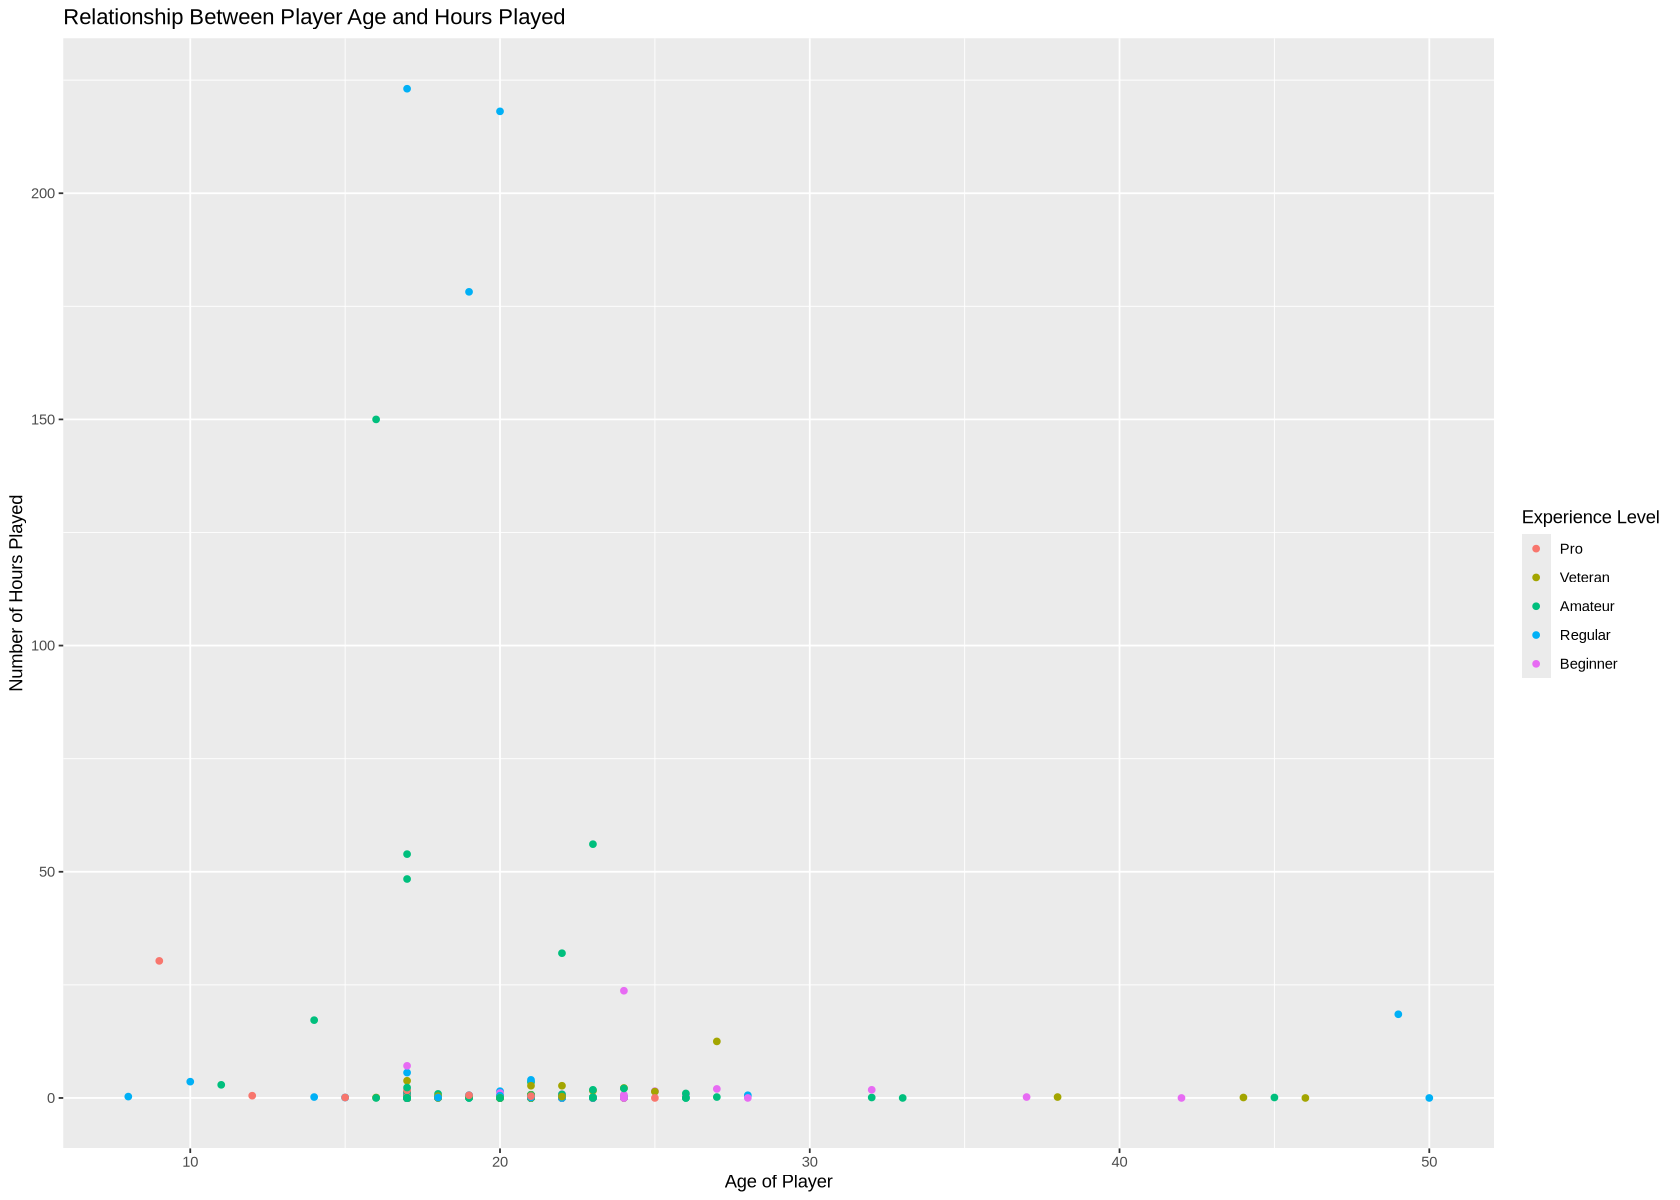

In [15]:
options(repr.plot.width = 14, repr.plot.height = 10)

player_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point() +
    labs(x = "Age of Player", y = "Number of Hours Played", title = "Relationship Between Player Age and Hours Played", color = "Experience Level")
player_plot

Looking at the plot above, the large variations in number of hours makes it difficult to interpret any trends and differences in the overall data. When approaching actual classification problems, we will attempt to scale and center the dataset so that the values ideally show a more clear distribution. Before this however, it may be useful to view and compare the mean age and number of played hours for each experience level to get an initial sense of the averages for each group. To make it easier to visualize patterns, the table will also be reordered from lowest experience level to highest - Beginner, Amateur, Regular, Pro, and Veteran.

In [24]:
player_means <- players |>
    group_by(experience) |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))  |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))) |>
    arrange(experience)
player_means

experience,mean_played_hours,mean_age
<fct>,<dbl>,<dbl>
Beginner,1.2485714,21.65714
Amateur,6.0174603,20.25397
Regular,18.2083333,20.60000
Pro,2.6000000,16.92308
Veteran,0.6479167,20.95833


Based on the mean values found above, as well as the distribution, it may already appear that the variables `played_hours` and `Age` may NOT be able to create an effective model for predicting experience level - since `mean_played_hours` increases with experience level until Regular where it starts to decrease, while `mean_age` seems to remain around 20 with the exception of the Pro category. Regardless, we will proceed with our analysis of the data to test if our assumptions are truly correct or not.

To do so, we will be building a classification model, splitting our data into training and test data, performing cross validation, and a number of other foundational steps in order to analyze the patterns in the `players` dataset. We'll start by setting the seed to a random value to ensure "reproducable randomness"

In [1]:
set.seed(2000)